<a href="https://colab.research.google.com/github/babupallam/Msc_AI_Module2_Natural_Language_Processing/blob/main/L07_Recurrent_Neural_Networks/Advanced_Concepts_in_Recurrent_Neural_Networks_(RNNs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **4.1. Long Short-Term Memory (LSTM) Networks**

- **What are LSTMs?**:
  - LSTMs are a type of RNN specifically designed to handle long-term dependencies.
  - Unlike traditional RNNs, LSTMs can learn when to "forget" previous information and when to retain it for future predictions.
  
- **Key Components of LSTMs**:
  - **Forget Gate**: Decides what portion of the previous hidden state should be carried forward.
  - **Input Gate**: Determines how much of the new input should influence the current hidden state.
  - **Output Gate**: Controls the information passed to the output layer from the current hidden state.
  
- **When to Use LSTMs**:
  - Use LSTMs when the input sequence is long, and the RNN struggles with remembering important details from earlier in the sequence.
  - Common applications include machine translation, time series forecasting, and text generation.

**LSTM Implementation in PyTorch**:

Step 1: Import Required Libraries


In [4]:
import torch
import torch.nn as nn  # Importing the neural network module
import torch.optim as optim  # Importing optimization algorithms


Step 2: Define the LSTM Model


In [5]:
class LSTM(nn.Module):  # Inherit from PyTorch's base class for models
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTM, self).__init__()  # Call the parent class constructor

        # Define the LSTM layer
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)

        # Define a fully connected layer that maps from hidden_size to output_size
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, input_seq):
        # Passing input through the LSTM layer
        lstm_out, _ = self.lstm(input_seq)  # lstm_out is the sequence of hidden states

        # We are interested only in the hidden state from the last time step (for classification)
        last_hidden_state = lstm_out[:, -1, :]  # Take the last time step of each sequence

        # Passing the last hidden state through the fully connected layer
        output = self.fc(last_hidden_state)

        return output


Step 3: Create Synthetic Data for Demonstration


In [6]:
# Hyperparameters
input_size = 10      # Each time step has 10 features
hidden_size = 50     # LSTM has 50 hidden units
output_size = 3      # We want to classify into 3 categories
sequence_length = 5  # Each sequence has 5 time steps
batch_size = 16      # Process 16 sequences at a time

# Initialize the LSTM model
model = LSTM(input_size, hidden_size, output_size)

# Create a batch of synthetic input data
input_data = torch.randn(batch_size, sequence_length, input_size)  # Random input (batch_size, seq_len, input_size)

# Create synthetic target labels (randomly generated classes for each sequence)
target_data = torch.randint(0, output_size, (batch_size,))


Step 4: Define the Loss Function and Optimizer


In [7]:
# Define the loss function (suitable for classification tasks)
criterion = nn.CrossEntropyLoss()

# Define the optimizer (Adam optimizer)
optimizer = optim.Adam(model.parameters(), lr=0.001)


Step 5: Forward Pass (One Step)


In [8]:
# Forward pass: Get model predictions
output = model(input_data)

# Compute the loss
loss = criterion(output, target_data)
print(f"Initial Loss: {loss.item()}")


Initial Loss: 1.1056855916976929


Step 6: Backward Pass and Optimization


In [9]:
# Zero the gradients (important before running the backward pass)
optimizer.zero_grad()

# Backward pass: compute gradients
loss.backward()

# Perform a single optimization step
optimizer.step()

print(f"Loss after one optimization step: {loss.item()}")


Loss after one optimization step: 1.1056855916976929


Step 7: (Optional) Training Loop


In [10]:
# Training loop for demonstration (e.g., 10 epochs)
num_epochs = 10
for epoch in range(num_epochs):
    # Forward pass
    output = model(input_data)
    loss = criterion(output, target_data)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')


Epoch [1/10], Loss: 1.1013946533203125
Epoch [2/10], Loss: 1.0971400737762451
Epoch [3/10], Loss: 1.0929135084152222
Epoch [4/10], Loss: 1.0887048244476318
Epoch [5/10], Loss: 1.08450448513031
Epoch [6/10], Loss: 1.0803018808364868
Epoch [7/10], Loss: 1.0760867595672607
Epoch [8/10], Loss: 1.0718482732772827
Epoch [9/10], Loss: 1.0675755739212036
Epoch [10/10], Loss: 1.0632575750350952


8. Modify the Training Loop to Track Metrics


In [12]:
import matplotlib.pyplot as plt  # For visualization


In [13]:
# Function to simulate a simple sequence classification task
def generate_synthetic_data(batch_size, sequence_length, input_size, output_size):
    # Randomly generate sequences (batch_size, sequence_length, input_size)
    input_data = torch.randn(batch_size, sequence_length, input_size)

    # Randomly generate target classes (batch_size,)
    target_data = torch.randint(0, output_size, (batch_size,))

    return input_data, target_data

# Example synthetic data for training and validation
train_input, train_target = generate_synthetic_data(batch_size=100, sequence_length=5, input_size=10, output_size=3)
val_input, val_target = generate_synthetic_data(batch_size=20, sequence_length=5, input_size=10, output_size=3)


In [14]:
# Function to train the LSTM model
def train_model(model, train_input, train_target, val_input, val_target, num_epochs=20, learning_rate=0.001):
    # Loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Lists to store loss values for plotting
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        # Set model to training mode
        model.train()

        # Forward pass
        output = model(train_input)
        train_loss = criterion(output, train_target)

        # Backward pass and optimization
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        # Track training loss
        train_losses.append(train_loss.item())

        # Validation (without updating weights)
        model.eval()
        with torch.no_grad():
            val_output = model(val_input)
            val_loss = criterion(val_output, val_target)
            val_losses.append(val_loss.item())

        # Print losses
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

    return train_losses, val_losses


Epoch [1/20], Train Loss: 1.0988, Val Loss: 1.0690
Epoch [2/20], Train Loss: 1.0969, Val Loss: 1.0698
Epoch [3/20], Train Loss: 1.0950, Val Loss: 1.0707
Epoch [4/20], Train Loss: 1.0931, Val Loss: 1.0715
Epoch [5/20], Train Loss: 1.0913, Val Loss: 1.0723
Epoch [6/20], Train Loss: 1.0895, Val Loss: 1.0731
Epoch [7/20], Train Loss: 1.0877, Val Loss: 1.0739
Epoch [8/20], Train Loss: 1.0860, Val Loss: 1.0748
Epoch [9/20], Train Loss: 1.0842, Val Loss: 1.0756
Epoch [10/20], Train Loss: 1.0825, Val Loss: 1.0764
Epoch [11/20], Train Loss: 1.0807, Val Loss: 1.0773
Epoch [12/20], Train Loss: 1.0790, Val Loss: 1.0781
Epoch [13/20], Train Loss: 1.0773, Val Loss: 1.0790
Epoch [14/20], Train Loss: 1.0755, Val Loss: 1.0798
Epoch [15/20], Train Loss: 1.0737, Val Loss: 1.0807
Epoch [16/20], Train Loss: 1.0719, Val Loss: 1.0816
Epoch [17/20], Train Loss: 1.0701, Val Loss: 1.0825
Epoch [18/20], Train Loss: 1.0683, Val Loss: 1.0834
Epoch [19/20], Train Loss: 1.0664, Val Loss: 1.0844
Epoch [20/20], Train 

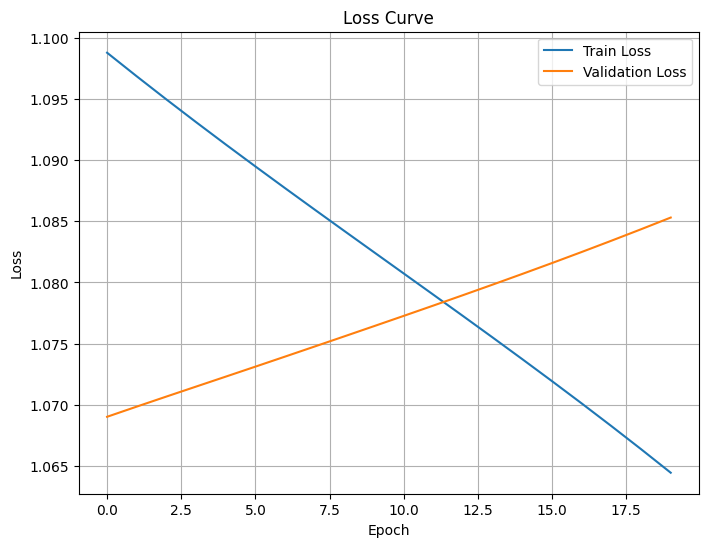

In [15]:
# Function to plot the loss curves
def plot_loss(train_losses, val_losses):
    plt.figure(figsize=(8,6))
    plt.plot(train_losses, label="Train Loss")
    plt.plot(val_losses, label="Validation Loss")
    plt.title("Loss Curve")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

# Train the model and visualize the loss
model = LSTM(input_size=10, hidden_size=50, output_size=3)

# Training the model and collecting loss metrics
train_losses, val_losses = train_model(model, train_input, train_target, val_input, val_target, num_epochs=20)

# Plotting the training and validation loss
plot_loss(train_losses, val_losses)


In [16]:
# Function to test the model on unseen data and visualize predictions
def test_model(model, test_input, test_target):
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        predictions = model(test_input)
        predicted_classes = torch.argmax(predictions, dim=1)  # Get the predicted class

    # Compare predicted classes to true classes
    print(f"Predicted Classes: {predicted_classes.tolist()}")
    print(f"True Classes:      {test_target.tolist()}")

    return predicted_classes

# Generating test data
test_input, test_target = generate_synthetic_data(batch_size=10, sequence_length=5, input_size=10, output_size=3)

# Testing the model
predictions = test_model(model, test_input, test_target)


Predicted Classes: [2, 2, 2, 2, 2, 2, 2, 0, 2, 2]
True Classes:      [1, 2, 0, 0, 2, 0, 2, 2, 1, 1]



#### **4.2. Gated Recurrent Units (GRUs)**

- **What are GRUs?**:
  - GRUs are another variation of RNNs, similar to LSTMs, but they use fewer gates, making them simpler and faster to train.
  
- **Key Components of GRUs**:
  - **Reset Gate**: Decides how much of the past information to forget.
  - **Update Gate**: Decides how much of the new information to add to the hidden state.
  
- **When to Use GRUs**:
  - GRUs are often used when computational efficiency is a priority, as they tend to be faster to train than LSTMs while still handling long-term dependencies well.
  
**GRU Implementation in PyTorch**:

GRU Model: Replace the LSTM layer with a GRU layer.

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define the GRU model
class GRU(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(GRU, self).__init__()
        # Define a GRU layer
        self.gru = nn.GRU(input_size, hidden_size, batch_first=True)
        # Define a fully connected layer
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, input_seq):
        # Forward pass through GRU
        gru_out, _ = self.gru(input_seq)
        # Take the last time step's output
        last_hidden_state = gru_out[:, -1, :]
        # Pass through the fully connected layer to get the output
        output = self.fc(last_hidden_state)
        return output



Data Preparation: Use synthetic data similar to the LSTM example.

In [18]:

# Generate synthetic data (random sequences and classes)
def generate_synthetic_data(batch_size, sequence_length, input_size, output_size):
    input_data = torch.randn(batch_size, sequence_length, input_size)
    target_data = torch.randint(0, output_size, (batch_size,))
    return input_data, target_data



Training Loop: Train the GRU model and store training/validation loss.

In [19]:

# Train the model
def train_model(model, train_input, train_target, val_input, val_target, num_epochs=20, learning_rate=0.001):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()
        # Forward pass on training data
        output = model(train_input)
        train_loss = criterion(output, train_target)

        # Backward pass and optimization
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        train_losses.append(train_loss.item())

        model.eval()
        with torch.no_grad():
            val_output = model(val_input)
            val_loss = criterion(val_output, val_target)
            val_losses.append(val_loss.item())

        # Print epoch results
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

    return train_losses, val_losses



Visualization: Plot training and validation loss.

Epoch [1/20], Train Loss: 1.0927, Val Loss: 1.0895
Epoch [2/20], Train Loss: 1.0890, Val Loss: 1.0895
Epoch [3/20], Train Loss: 1.0853, Val Loss: 1.0894
Epoch [4/20], Train Loss: 1.0818, Val Loss: 1.0894
Epoch [5/20], Train Loss: 1.0782, Val Loss: 1.0893
Epoch [6/20], Train Loss: 1.0748, Val Loss: 1.0893
Epoch [7/20], Train Loss: 1.0713, Val Loss: 1.0893
Epoch [8/20], Train Loss: 1.0679, Val Loss: 1.0894
Epoch [9/20], Train Loss: 1.0645, Val Loss: 1.0895
Epoch [10/20], Train Loss: 1.0611, Val Loss: 1.0896
Epoch [11/20], Train Loss: 1.0577, Val Loss: 1.0898
Epoch [12/20], Train Loss: 1.0543, Val Loss: 1.0900
Epoch [13/20], Train Loss: 1.0509, Val Loss: 1.0903
Epoch [14/20], Train Loss: 1.0475, Val Loss: 1.0906
Epoch [15/20], Train Loss: 1.0440, Val Loss: 1.0910
Epoch [16/20], Train Loss: 1.0405, Val Loss: 1.0915
Epoch [17/20], Train Loss: 1.0370, Val Loss: 1.0920
Epoch [18/20], Train Loss: 1.0334, Val Loss: 1.0926
Epoch [19/20], Train Loss: 1.0298, Val Loss: 1.0933
Epoch [20/20], Train 

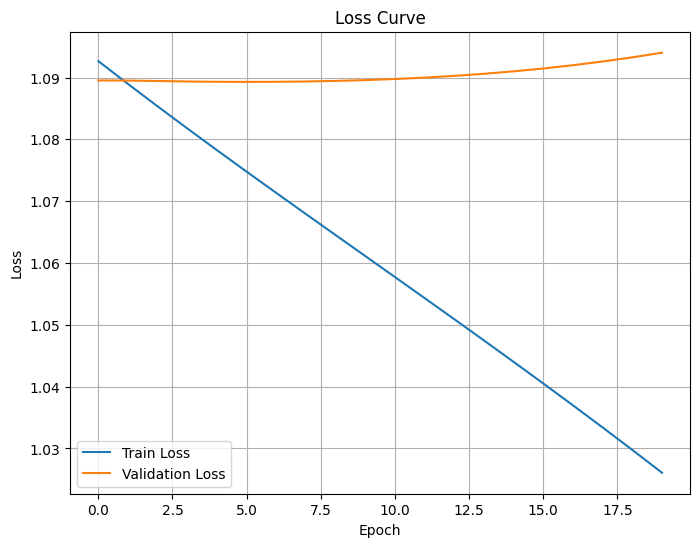

Predicted Classes: [0, 1, 2, 0, 1, 0, 2, 1, 1, 0]
True Classes:      [1, 0, 2, 2, 2, 2, 1, 2, 2, 1]


In [20]:

# Plot the loss curves
def plot_loss(train_losses, val_losses):
    plt.figure(figsize=(8,6))
    plt.plot(train_losses, label="Train Loss")
    plt.plot(val_losses, label="Validation Loss")
    plt.title("Loss Curve")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

# Test the model and visualize predictions
def test_model(model, test_input, test_target):
    model.eval()
    with torch.no_grad():
        predictions = model(test_input)
        predicted_classes = torch.argmax(predictions, dim=1)

    print(f"Predicted Classes: {predicted_classes.tolist()}")
    print(f"True Classes:      {test_target.tolist()}")

    return predicted_classes

# Example usage
if __name__ == "__main__":
    # Hyperparameters
    input_size = 10         # Number of input features at each time step
    hidden_size = 50        # Number of hidden units in the GRU
    output_size = 3         # Number of output classes
    sequence_length = 5     # Number of time steps in each sequence
    batch_size = 100        # Number of sequences in each batch

    # Generate synthetic training and validation data
    train_input, train_target = generate_synthetic_data(batch_size, sequence_length, input_size, output_size)
    val_input, val_target = generate_synthetic_data(batch_size=20, sequence_length=sequence_length, input_size=input_size, output_size=output_size)

    # Initialize the GRU model
    model = GRU(input_size=input_size, hidden_size=hidden_size, output_size=output_size)

    # Train the model and plot loss curves
    train_losses, val_losses = train_model(model, train_input, train_target, val_input, val_target, num_epochs=20)
    plot_loss(train_losses, val_losses)

    # Generate synthetic test data
    test_input, test_target = generate_synthetic_data(batch_size=10, sequence_length=sequence_length, input_size=input_size, output_size=output_size)

    # Test the model on unseen test data
    predictions = test_model(model, test_input, test_target)



#### **4.3. Bidirectional RNNs**

- **What are Bidirectional RNNs?**:
  - In a standard RNN, information flows in one direction—from past to future.
  - Bidirectional RNNs, however, process information in both directions. This means the network has access to both past and future context at each point in the sequence.
  
- **Advantages of Bidirectional RNNs**:
  - They are particularly useful for tasks where context from both the past and future is important, such as named entity recognition or speech recognition.
  
**Bidirectional RNN Implementation in PyTorch**:

In [23]:
import torch
import torch.nn as nn

# Define the Bidirectional RNN class
class BidirectionalRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(BidirectionalRNN, self).__init__()

        # Define the bidirectional RNN layer
        self.rnn = nn.RNN(input_size, hidden_size, bidirectional=True, batch_first=True)

        # Linear layer maps hidden states from both directions (2 * hidden_size) to output_size
        self.fc = nn.Linear(hidden_size * 2, output_size)

    def forward(self, input_seq):
        """
        Forward pass for the Bidirectional RNN.

        Parameters:
        input_seq: Tensor of shape (batch_size, sequence_length, input_size)

        Returns:
        output: Tensor of shape (batch_size, output_size)
        """
        # Get RNN output (batch_size, seq_len, hidden_size*2)
        rnn_out, _ = self.rnn(input_seq)

        # We want the hidden states from the last time step (from both directions)
        # Take the last time step's output (batch_size, hidden_size*2)
        last_hidden_state = rnn_out[:, -1, :]

        # Pass through fully connected layer to get final output (batch_size, output_size)
        output = self.fc(last_hidden_state)

        return output

# Example usage of the Bidirectional RNN
if __name__ == "__main__":
    # Hyperparameters
    input_size = 10      # Number of input features at each time step
    hidden_size = 20     # Number of hidden units in the RNN (per direction)
    output_size = 5      # Number of output classes (for classification)
    sequence_length = 7  # Length of the input sequences
    batch_size = 16      # Number of sequences in each batch

    # Create an instance of the Bidirectional RNN
    bidir_rnn = BidirectionalRNN(input_size, hidden_size, output_size)

    # Generate some random input data (batch_size, sequence_length, input_size)
    input_data = torch.randn(batch_size, sequence_length, input_size)

    # Perform a forward pass through the model
    output = bidir_rnn(input_data)

    # Print the output shape (should be (batch_size, output_size))
    print(f"Output shape: {output.shape}")


Output shape: torch.Size([16, 5])



#### **4.4. Sequence-to-Sequence Models and Attention Mechanisms**

- **What is Sequence-to-Sequence (Seq2Seq)?**:
  - Seq2Seq models are used when the input and output are both sequences, such as in machine translation or summarization.
  - They use two RNNs: an **encoder** to process the input sequence and a **decoder** to generate the output sequence.
  
- **What is Attention?**:
  - Attention mechanisms allow the model to focus on specific parts of the input sequence when generating the output, improving the model’s performance for tasks with longer sequences.
  
- **Applications of Seq2Seq with Attention**:
  - Machine translation (e.g., translating English sentences to French).
  - Text summarization (e.g., summarizing long articles into short summaries).
  - Image captioning (describing the content of an image in a sentence).

**Attention-Based Seq2Seq Example**:

In [25]:
class Encoder(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Encoder, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)

    def forward(self, src):
        # src: (batch_size, sequence_length, input_size)
        encoder_output, hidden = self.rnn(src)  # encoder_output: (batch_size, seq_len, hidden_size)
        return encoder_output, hidden  # hidden: (1, batch_size, hidden_size)


In [26]:
class Decoder(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Decoder, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, trg, hidden, encoder_output):
        # trg: (batch_size, sequence_length, input_size)
        # hidden: (1, batch_size, hidden_size)
        rnn_output, hidden = self.rnn(trg, hidden)  # hidden is passed as initial hidden state
        output = self.fc(rnn_output)  # output: (batch_size, seq_len, output_size)
        return output


In [27]:
import torch
import torch.nn as nn

class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder):
        super(Seq2Seq, self).__init__()
        self.encoder = encoder
        self.decoder = decoder

    def forward(self, src, trg):
        # src: (batch_size, src_seq_len, input_size)
        # trg: (batch_size, trg_seq_len, input_size)

        # Pass the source sequence through the encoder
        encoder_output, hidden = self.encoder(src)

        # Pass the encoder hidden state and target sequence to the decoder
        output = self.decoder(trg, hidden, encoder_output)
        return output

# Example usage
if __name__ == "__main__":
    # Hyperparameters
    input_size = 10       # Number of input features (for each time step)
    hidden_size = 20      # Number of hidden units in the RNN
    output_size = 5       # Number of output classes (for each time step in decoder)
    src_seq_len = 7       # Length of source sequence
    trg_seq_len = 5       # Length of target sequence
    batch_size = 16       # Number of sequences in a batch

    # Create encoder and decoder
    encoder = Encoder(input_size, hidden_size)
    decoder = Decoder(input_size, hidden_size, output_size)

    # Create Seq2Seq model
    seq2seq = Seq2Seq(encoder, decoder)

    # Generate random source and target sequences (batch_size, seq_len, input_size)
    src = torch.randn(batch_size, src_seq_len, input_size)
    trg = torch.randn(batch_size, trg_seq_len, input_size)

    # Perform a forward pass through the Seq2Seq model
    output = seq2seq(src, trg)

    # Output shape should be (batch_size, trg_seq_len, output_size)
    print(f"Output shape: {output.shape}")


Output shape: torch.Size([16, 5, 5])



#### **4.5. Transformer Networks**

- **What are Transformers?**:
  - Transformers are a more recent architecture designed to handle sequence data without relying on recurrence (as in RNNs).
  - Instead, transformers use attention mechanisms to model dependencies in the data.
  
- **Advantages of Transformers**:
  - They can handle long sequences more effectively than traditional RNNs.
  - They allow for parallel processing, making them much faster to train.

**Popular Transformer Models**:
- **BERT (Bidirectional Encoder Representations from Transformers)**: Used for tasks like text classification, question answering, and more.
- **GPT (Generative Pre-trained Transformer)**: A popular model used for text generation.

**Further Resources**:
- Study how transformer models have revolutionized natural language processing tasks.
- Experiment with transformer-based models on text classification or translation tasks using libraries like Hugging Face's `transformers`.

---



#### **4.6. Hyperparameter Tuning**

- **Why is Hyperparameter Tuning Important?**:
  - The performance of RNNs (and deep learning models in general) can be heavily influenced by hyperparameters, such as the learning rate, number of hidden layers, hidden state size, and batch size.
  
- **Key Hyperparameters to Tune**:
  - **Learning Rate**: Affects how quickly the model learns. Too high, and the model may not converge; too low, and the model will learn too slowly.
  - **Hidden Size**: Larger hidden states can capture more complex patterns but require more computational resources.
  - **Batch Size**: Smaller batches give more accurate gradients, while larger batches can lead to faster training.
  
**Further Resources**:
- Perform grid search or random search for hyperparameter tuning.
- Use tools like `Ray Tune` or `Optuna` for more advanced hyperparameter optimization.

---



#### **4.7. Using Pretrained Models**

- **Why Use Pretrained Models?**:
  - Pretrained models save time and resources by leveraging models that have already been trained on large datasets.
  - Transfer learning allows you to fine-tune these models on your own data with minimal additional training.

- **Popular Pretrained Models**:
  - **BERT**: For language understanding tasks.
  - **GPT**: For text generation tasks.
  - **ELMo**: Contextual embeddings for improving downstream tasks.

**Further Resources**:
- Experiment with pretrained models using frameworks like Hugging Face.
- Fine-tune pretrained models for specific NLP tasks like sentiment analysis or named entity recognition.

---